#### Check out width distributions

In [1]:
# import fiona
from shapely import LineString, segmentize
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
## Set-up
mdata_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC/data/'
prep_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_data/NHD_prepped/'

In [4]:
# Define dtypes for lookup tables to preserve leading zeros
dtype_dic= {'HUC4': str, 'HUC2': str, 'toBasin': str, 'level': str}
# Read in HUC lookup table
lookup = pd.read_csv(os.path.join(mdata_path, 'HUC4_lookup_no_great_lakes.csv'), dtype=dtype_dic)

In [5]:
# Get slurm job index
i = 1

# Get current HUC2 and HUC4 IDs
hu2 = 'HUC2_' + lookup.loc[i,'HUC4'][0:2]
hu4 = 'NHDPLUS_H_' + lookup.loc[i,'HUC4'] + '_HU4_GDB'

In [6]:
# Set data filepath
file_path = os.path.join(prep_path, hu2, hu4 + '_prepped.gpkg')

In [9]:
# fiona.listlayers(file_path)

In [10]:
# Read in NHD flowlines
basin = gpd.read_file(filename=file_path, engine='pyogrio')

In [11]:
basin.columns

Index(['Permanent_Identifier', 'FDate', 'Resolution', 'GNIS_ID', 'GNIS_Name',
       'LengthKM', 'ReachCode', 'FlowDir', 'WBArea_Permanent_Identifier',
       'FType', 'FCode', 'MainPath', 'InNetwork', 'VisibilityFilter',
       'Shape_Length', 'NHDPlusID', 'VPUID', 'Enabled', 'StreamLeve',
       'StreamOrde', 'StreamCalc', 'FromNode', 'ToNode', 'HydroSeq',
       'LevelPathI', 'PathLength', 'TerminalPa', 'ArbolateSu', 'Divergence',
       'StartFlag', 'TerminalFl', 'UpLevelPat', 'UpHydroSeq', 'DnLevel',
       'DnLevelPat', 'DnHydroSeq', 'DnMinorHyd', 'DnDrainCou', 'FromMeas',
       'ToMeas', 'RtnDiv', 'Thinner', 'VPUIn', 'VPUOut', 'AreaSqKm',
       'TotDASqKm', 'DivDASqKm', 'MaxElevRaw', 'MinElevRaw', 'MaxElevSmo',
       'MinElevSmo', 'Slope', 'SlopeLenKm', 'ElevFixed', 'HWType',
       'HWNodeSqKm', 'StatusFlag', 'QAMA', 'VAMA', 'QIncrAMA', 'QBMA', 'VBMA',
       'QIncrBMA', 'QCMA', 'VCMA', 'QIncrCMA', 'QDMA', 'VDMA', 'QIncrDMA',
       'QEMA', 'VEMA', 'QIncrEMA', 'QFMA', 'QIncr

In [19]:
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]',
         '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]', '(90, 100]',
         '(100, 150]', '(150, 200]',]

Text(0.5, 0, 'Bankfull widths (m)')

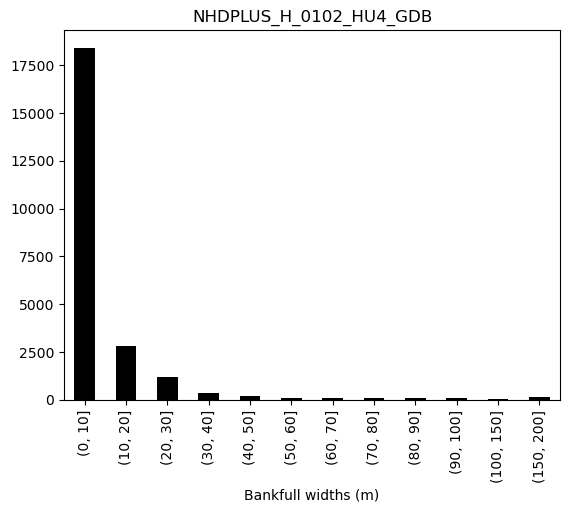

In [20]:
basin['Bin'].value_counts().loc[order].plot.bar(color='k')
plt.title(hu4)
plt.xlabel('Bankfull widths (m)')

In [40]:
min_width = basin.groupby('Bin').min('LengthKM')['LengthKM']

print('Minimum reach length by bin')
print('Width (m)\t' +  'Reach Length (m)')
for i in order:
    print(i + ':\t' + str(round(min_width.loc[i], 3)*1000))

Minimum reach length by bin
Width (m)	Reach Length (m)
(0, 10]:	2.0
(10, 20]:	3.0
(20, 30]:	4.0
(30, 40]:	4.0
(40, 50]:	13.0
(50, 60]:	11.0
(60, 70]:	17.0
(70, 80]:	8.0
(80, 90]:	19.0
(90, 100]:	15.0
(100, 150]:	7.0
(150, 200]:	23.0


In [42]:
mean_width = basin.groupby('Bin').mean('LengthKM')['LengthKM']

print('Mean reach length by bin\n')
print('Width (m)\t' +  'Reach Length (m)')
for i in order:
    print(i + ':\t' + str(round(mean_width.loc[i], 3)*1000))

Mean reach length by bin

Width (m)	Reach Length (m)
(0, 10]:	687.0
(10, 20]:	803.0
(20, 30]:	690.0
(30, 40]:	807.0
(40, 50]:	1054.0
(50, 60]:	1234.0
(60, 70]:	746.0
(70, 80]:	823.0
(80, 90]:	1087.0
(90, 100]:	893.0
(100, 150]:	665.0
(150, 200]:	1234.0


In [43]:
med_width = basin.groupby('Bin').median('LengthKM')['LengthKM']

print('Median reach length by bin\n')
print('Width (m)\t' +  'Reach Length (m)')
for i in order:
    print(i + ':\t' + str(round(med_width.loc[i], 3)*1000))

Median reach length by bin

Width (m)	Reach Length (m)
(0, 10]:	411.0
(10, 20]:	403.0
(20, 30]:	278.0
(30, 40]:	422.0
(40, 50]:	558.0
(50, 60]:	981.0
(60, 70]:	404.0
(70, 80]:	570.0
(80, 90]:	661.0
(90, 100]:	739.0
(100, 150]:	212.0
(150, 200]:	941.0


In [28]:
max_width = basin.groupby('Bin').max('LengthKM')['LengthKM']

print('Max reach length by bin\n')

for i in order:
    print(i + ':\t' + str(round(max_width.loc[i], 3)))

Max width (m) by bin

(0, 10]:	11.04
(10, 20]:	13.362
(20, 30]:	16.387
(30, 40]:	7.112
(40, 50]:	6.526
(50, 60]:	6.198
(60, 70]:	4.473
(70, 80]:	5.665
(80, 90]:	8.077
(90, 100]:	3.407
(100, 150]:	5.827
(150, 200]:	9.044


<Axes: >

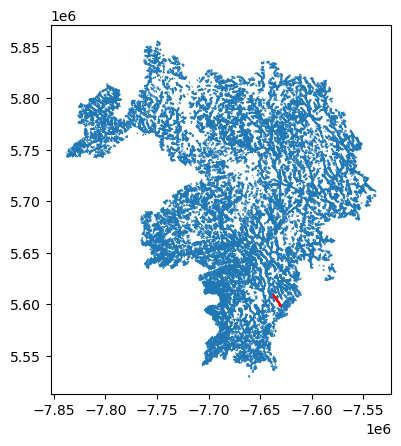

In [72]:
fig, ax = plt.subplots()
basin.plot(ax=ax)
basin[basin['LengthKM'] == 16.387000].plot(color='r', ax=ax)

In [33]:
basin.shape

(23569, 90)

In [32]:
basin[basin['LengthKM'] > 0.600]

Permanent_Identifier                     FDate  Resolution   GNIS_ID  \
2                150605581 2012-03-07 05:18:19+00:00           2      None   
9                150605699 2012-03-07 05:21:05+00:00           2      None   
11               149806012 2012-03-07 05:30:55+00:00           2  00575766   
13               149805987 2012-03-07 05:30:53+00:00           2      None   
14               103455184 2012-03-07 06:11:57+00:00           2      None   
...                    ...                       ...         ...       ...   
23549            145079517 2012-03-07 06:05:08+00:00           2  00578065   
23554            150087579 2012-03-07 14:53:44+00:00           2      None   
23559            150608234 2012-03-07 05:19:11+00:00           2  00573400   
23566            150091017 2012-03-07 14:50:09+00:00           2      None   
23567            150088595 2012-03-07 14:55:48+00:00           2      None   

                            GNIS_Name  LengthKM       ReachCode  FlowDir  \
2                                None     1.028  01020001002549        1   
9                                None     1.000  01020001002662        1   
11       South Branch Allagash Stream     1.078  01020002001208        1   
13                               None     1.910  01020002001189        1   
14                               None     2.487  01020004000642        1   
...                               ...       ...             ...      ...   
23549  West Branch Mattawamkeag River     2.660  01020003000153        1   
23554                            None     0.640  01020005004445        1   
23559                     Pine Stream     4.329  01020001000213        1   
23566                            None     1.342  01020005000856        1   
23567                            None     1.070  01020005005827        1   

      WBArea_Permanent_Identifier  FType  ...  AvgQAdjMA  GageIDMA  GageQMA  \
2                            None    460  ...        0.0         0      0.0   
9                            None    460  ...        0.0         0      0.0   
11                           None    460  ...        0.0         0      0.0   
13                           None    460  ...        0.0         0      0.0   
14                           None    460  ...        0.0         0      0.0   
...                           ...    ...  ...        ...       ...      ...   
23549                   145082202    558  ...        0.0         0      0.0   
23554                        None    460  ...        0.0         0      0.0   
23559                   150612310    558  ...        0.0         0      0.0   
23566                        None    460  ...        0.0         0      0.0   
23567                        None    460  ...        0.0         0      0.0   

                    DIVISION  phys_div     a      b     WidthM       Bin  \
2      APPALACHIAN HIGHLANDS       AHI  3.12  0.415   1.863384   (0, 10]   
9      APPALACHIAN HIGHLANDS       AHI  3.12  0.415   6.141126   (0, 10]   
11     APPALACHIAN HIGHLANDS       AHI  3.12  0.415   3.391849   (0, 10]   
13     APPALACHIAN HIGHLANDS       AHI  3.12  0.415   3.706418   (0, 10]   
14     APPALACHIAN HIGHLANDS       AHI  3.12  0.415   4.249339   (0, 10]   
...                      ...       ...   ...    ...        ...       ...   
23549  APPALACHIAN HIGHLANDS       AHI  3.12  0.415  51.312997  (50, 60]   
23554  APPALACHIAN HIGHLANDS       AHI  3.12  0.415   1.261893   (0, 10]   
23559  APPALACHIAN HIGHLANDS       AHI  3.12  0.415  21.441473  (20, 30]   
23566  APPALACHIAN HIGHLANDS       AHI  3.12  0.415   3.212328   (0, 10]   
23567  APPALACHIAN HIGHLANDS       AHI  3.12  0.415   3.392885   (0, 10]   

                                                geometry  
2      MULTILINESTRING Z ((-7787454.465 5801676.029 0...  
9      MULTILINESTRING Z ((-7758075.326 5816299.273 0...  
11     MULTILINESTRING Z ((-7758249.255 5837223.112 0...  
13     MULTILINESTRING Z ((-7759471.653 5844318.926 0...  

In [36]:
basin.loc[10,'LengthKM']

np.float64(0.094)

In [75]:
basin.loc[[10],'geometry']

In [81]:
test = basin.loc[[10],'geometry'].explode()

In [83]:
test.geometry

10    LINESTRING Z (-7758395.883 5820431.781 0, -775...
Name: geometry, dtype: geometry

In [85]:
test.get_coordinates

<bound method GeoPandasBase.get_coordinates of 10    LINESTRING Z (-7758395.883 5820431.781 0, -775...
Name: geometry, dtype: geometry>

In [78]:
for pt1,pt2 in zip(test.coords, test.coords[1:]):
    print(LineString([pt1,pt2]))

AttributeError: 'GeoSeries' object has no attribute 'coords'

<Axes: >

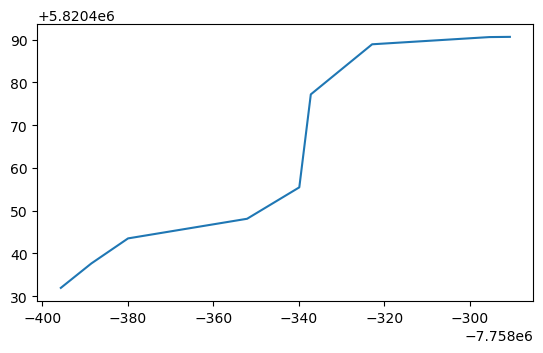

In [29]:
basin.loc[[10],'geometry'].plot()

In [58]:
test = basin.loc[[10],:].explode()

In [59]:
test

Permanent_Identifier                     FDate  Resolution GNIS_ID  \
10            150605351 2012-03-07 05:18:14+00:00           2    None   

   GNIS_Name  LengthKM       ReachCode  FlowDir WBArea_Permanent_Identifier  \
10      None     0.094  01020001000906        1                        None   

    FType  ...  AvgQAdjMA  GageIDMA  GageQMA               DIVISION  phys_div  \
10    460  ...        0.0         0      0.0  APPALACHIAN HIGHLANDS       AHI   

       a      b    WidthM      Bin  \
10  3.12  0.415  6.008258  (0, 10]   

                                             geometry  
10  LINESTRING Z (-7758395.883 5820431.781 0, -775...  

[1 rows x 90 columns]

<Axes: >

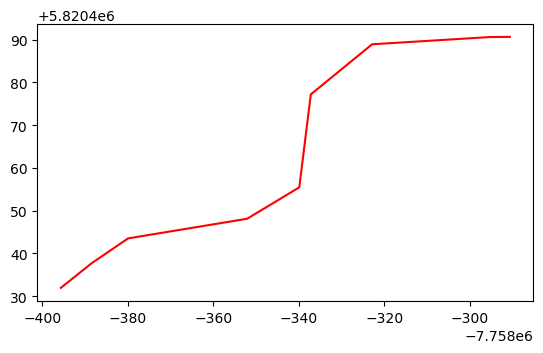

In [60]:
test.plot(cmap='hsv')

In [62]:
test1 = segmentize(geometry=test['geometry'], max_segment_length=0.01)

In [63]:
test1

10    LINESTRING Z (-7758395.883 5820431.781 0, -775...
Name: geometry, dtype: geometry

<Axes: >

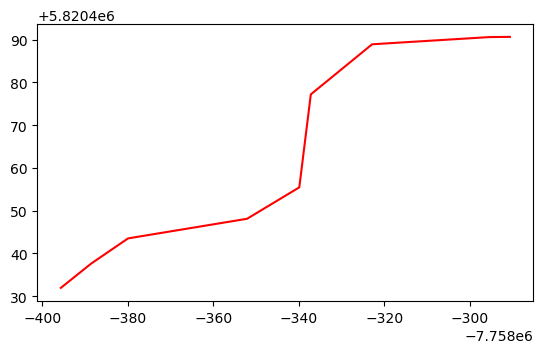

In [64]:
test1.plot(cmap='hsv')

<Axes: >

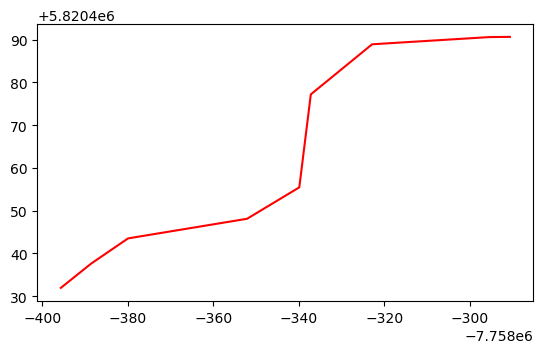

In [45]:
test.plot(cmap='hsv')

In [48]:
line = LineString([(0, 0), (0, 10)])

In [ ]:

segmentize(line, max_segment_length=5)
<LINESTRING (0 0, 0 5, 0 10)>
polygon = Polygon([(0, 0), (10, 0), (10, 10), (0, 10), (0, 0)])
segmentize(polygon, max_segment_length=5)
<POLYGON ((0 0, 5 0, 10 0, 10 5, 10 10, 5 10, 0 10, 0 5, 0 0))>
segmentize(None, max_segment_length=5) is None
True